In [18]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [1]:
pkl_filename = "pickle_model.pkl"

with open(pkl_filename, 'rb') as file:
    pickle_model = pickle.load(file)

In [7]:
x=np.load('COLLIPULLI_4.npy')

In [129]:
def plot(x,inicio,reg,modelo):
    points=100
    fin=inicio+points
    data=np.copy(x[inicio:inicio+reg])
    y_pred=[]
    y_real=[]
    eje_x=[]
    for i in range(points):
        Ypredict = pickle_model.predict(data.reshape(1, -1))
        y_pred.append(Ypredict.reshape(-1)[0])
        data= np.delete(data, (0), axis=0)
        row=np.concatenate((Ypredict,x[inicio+reg+i,-2:x.shape[1]].reshape(1, -1)), axis=1)
        data=np.concatenate((data,row))
        y_real.append(x[inicio+reg+i,0])
        eje_x.append(x[inicio+reg+i,x.shape[1]-2]*60*24+x[inicio+reg+i,x.shape[1]-1])
        pass
    plt.plot(np.array(eje_x),np.array(y_real), label='real')
    plt.plot(np.array(eje_x),np.array(y_pred), label='pred')
    plt.legend()
    plt.savefig('curvas.png')

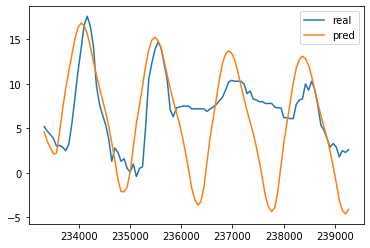

In [130]:
plot(x,1600,5,pickle_model)